# Data Understanding

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [305]:
# dataset reading
house_price=pd.read_csv("C:\\Users\\win\\Downloads\\train.csv")
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [306]:
house_price.shape

(1460, 81)

In [307]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [308]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [309]:
# Integer and Float variables in the dataset
house_price_dtype=house_price.select_dtypes(include=['float64','int64'])
house_price_dtype.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [310]:
house_price_dtype.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [311]:
house_price_dtype=house_price_dtype.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'],axis=1)

In [312]:
house_price_dtype.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [313]:
#For outliers
house_price_dtype.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


(1408, 81)

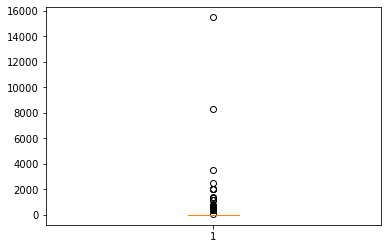

In [314]:
plt.boxplot(house_price['MiscVal'])
Q1 = house_price['MiscVal'].quantile(0.1)
Q3 = house_price['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
house_price= house_price[(house_price['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (house_price['MiscVal'] <= Q3 + 1.5*IQR)]
house_price.shape

(1402, 81)

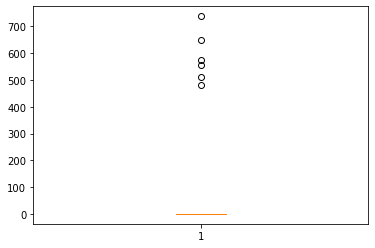

In [315]:
plt.boxplot(house_price['PoolArea'])
Q1 = house_price['PoolArea'].quantile(0.1)
Q3 = house_price['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
house_price = house_price[(house_price['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (house_price['PoolArea'] <= Q3 + 1.5*IQR)]
house_price.shape

(1402, 81)

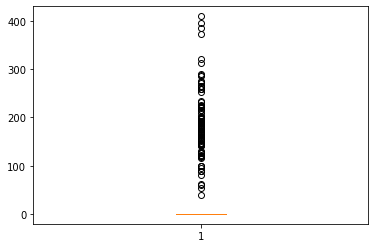

In [316]:
plt.boxplot(house_price['ScreenPorch'])
Q1 = house_price['ScreenPorch'].quantile(0.1)
Q3 = house_price['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
house = house_price[(house_price['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (house_price['ScreenPorch'] <= Q3 + 1.5*IQR)]
house_price.shape

(1402, 81)

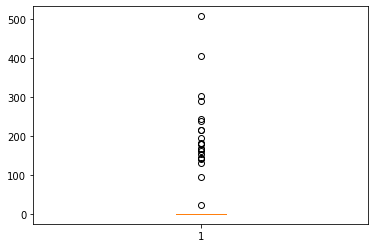

In [317]:
plt.boxplot(house_price['3SsnPorch'])
Q1 = house_price['3SsnPorch'].quantile(0.1)
Q3 = house_price['3SsnPorch'].quantile(0.9)
IQR = Q3 - Q1
house = house_price[(house_price['3SsnPorch'] >= Q1 - 1.5*IQR) & 
                      (house_price['3SsnPorch'] <= Q3 + 1.5*IQR)]
house_price.shape

(1381, 81)

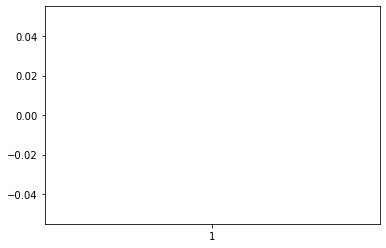

In [318]:
plt.boxplot(house_price['MasVnrArea'])
Q1 = house_price['MasVnrArea'].quantile(0.1)
Q3 = house_price['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
house_price= house_price[(house_price['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (house_price['MasVnrArea'] <= Q3 + 1.5*IQR)]
house_price.shape

(1362, 81)

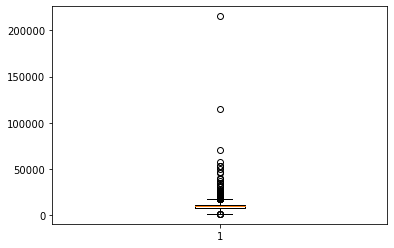

In [319]:
plt.boxplot(house_price['LotArea'])
Q1 = house_price['LotArea'].quantile(0.1)
Q3 = house_price['LotArea'].quantile(0.9)
IQR = Q3 - Q1
house_price= house_price[(house_price['LotArea'] >= Q1 - 1.5*IQR) & 
                      (house_price['LotArea'] <= Q3 + 1.5*IQR)]
house_price.shape

### Correlation

In [320]:
corre=house_price_dtype.corr()
corre

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,...,0.008273,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,...,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.033226,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,...,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,...,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,...,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,...,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


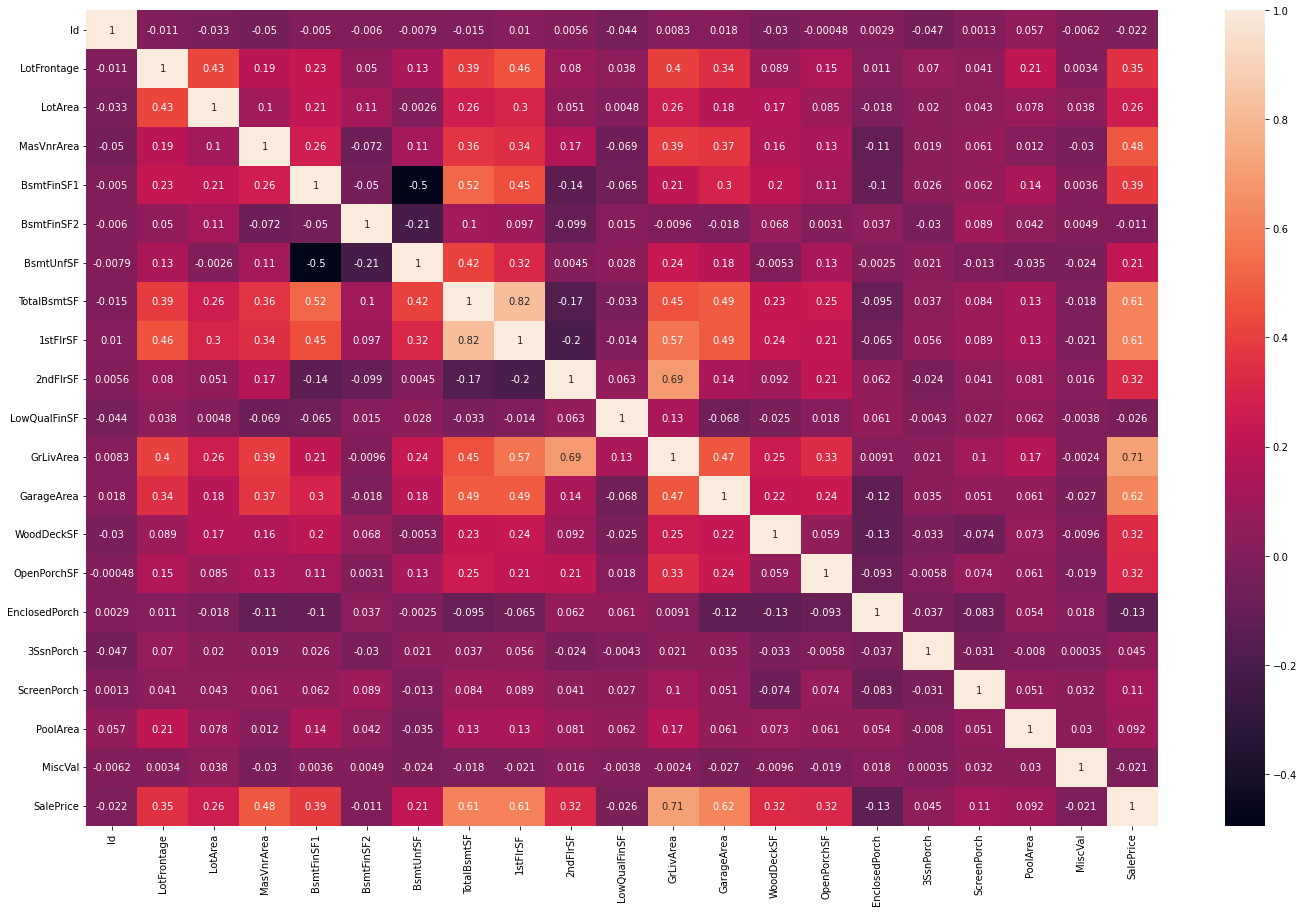

In [321]:
# corelation heatmap
plt.figure(figsize=(24,15))
sns.heatmap(corre,annot=True)
plt.show()

# Data Cleaning

In [322]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1362 non-null   int64  
 1   MSSubClass     1362 non-null   int64  
 2   MSZoning       1362 non-null   object 
 3   LotFrontage    1129 non-null   float64
 4   LotArea        1362 non-null   int64  
 5   Street         1362 non-null   object 
 6   Alley          83 non-null     object 
 7   LotShape       1362 non-null   object 
 8   LandContour    1362 non-null   object 
 9   Utilities      1362 non-null   object 
 10  LotConfig      1362 non-null   object 
 11  LandSlope      1362 non-null   object 
 12  Neighborhood   1362 non-null   object 
 13  Condition1     1362 non-null   object 
 14  Condition2     1362 non-null   object 
 15  BldgType       1362 non-null   object 
 16  HouseStyle     1362 non-null   object 
 17  OverallQual    1362 non-null   int64  
 18  OverallC

In [323]:
#chceking the null values
house_price.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      233
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [324]:
#Percentage of missing values
round(100*(house.isnull().sum()/len(house_price.index)), 2)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      17.4
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64

In [325]:
# Null Value
house_price['LotFrontage'].fillna(0, inplace=True)

In [326]:
house_price['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [327]:
house_price['PoolQC'].fillna('No Pool', inplace=True)

In [328]:
house_price['Fence'].fillna('No Fence', inplace=True)

In [329]:
house_price['MiscFeature'].fillna('No MiscFeature', inplace=True)

In [330]:
house_price['GarageType'].fillna('No Garage', inplace=True) 
house_price['GarageFinish'].fillna('No Garage', inplace=True) 
house_price['GarageQual'].fillna('No Garage', inplace=True)
house_price['GarageYrBlt'].fillna('No Garage', inplace=True) 
house_price['GarageCond'].fillna('No Garage', inplace=True) 

In [331]:
house_price.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [332]:
# year to number of years
house_price['YearBuilt'] = 2019 - house_price['YearBuilt']
house_price['YearRemodAdd'] = 2019 - house_price['YearRemodAdd']
house_price['YrSold'] = 2019 - house_price['YrSold']

In [333]:
#convert integer typr to object for categorical variables
house_price['MSSubClass'] = house_price['MSSubClass'].astype('object')
house_price['OverallQual'] = house_price['OverallQual'].astype('object')
house_price['OverallCond'] = house_price['OverallCond'].astype('object')
house_price['BsmtFullBath'] = house_price['BsmtFullBath'].astype('object')
house_price['BsmtHalfBath'] = house_price['BsmtHalfBath'].astype('object')
house_price['FullBath'] = house_price['FullBath'].astype('object')
house_price['HalfBath'] = house_price['HalfBath'].astype('object')
house_price['BedroomAbvGr'] = house_price['BedroomAbvGr'].astype('object')
house_price['KitchenAbvGr'] = house_price['KitchenAbvGr'].astype('object')
house_price['TotRmsAbvGrd'] = house_price['TotRmsAbvGrd'].astype('object')
house_price['Fireplaces'] = house_price['Fireplaces'].astype('object')
house_price['GarageCars'] = house_price['GarageCars'].astype('object')

In [334]:
house_price.shape

(1362, 81)

In [335]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1362 non-null   int64  
 1   MSSubClass     1362 non-null   object 
 2   MSZoning       1362 non-null   object 
 3   LotFrontage    1362 non-null   float64
 4   LotArea        1362 non-null   int64  
 5   Street         1362 non-null   object 
 6   Alley          83 non-null     object 
 7   LotShape       1362 non-null   object 
 8   LandContour    1362 non-null   object 
 9   Utilities      1362 non-null   object 
 10  LotConfig      1362 non-null   object 
 11  LandSlope      1362 non-null   object 
 12  Neighborhood   1362 non-null   object 
 13  Condition1     1362 non-null   object 
 14  Condition2     1362 non-null   object 
 15  BldgType       1362 non-null   object 
 16  HouseStyle     1362 non-null   object 
 17  OverallQual    1362 non-null   object 
 18  OverallC

## Dummy Variables

In [336]:
list1=  ['Street']

In [337]:
def mapping(x):
    return x.map({'Pave': 1, "Grvl": 0})

In [338]:
house_price[list1] =house_price[list1].apply(mapping)

In [339]:
list2 =  ['Utilities']

In [340]:
def mapping(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

In [341]:
house_price[list2] =house_price[list2].apply(mapping)

In [342]:
list3 =  ['CentralAir']

In [343]:
def mapping(x):
    return x.map({'Y': 1, "N": 0})

In [344]:
house_price[list3] =house_price[list3].apply(mapping)

# Data Preparation

In [345]:
X =house_price.drop([ 'Id'], axis=1)

In [346]:
# dummy variable for categorical variables
house_price_categorical = X.select_dtypes(include=['object'])
house_price_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,RFn,2,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal
1,20,RL,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,RFn,2,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal
2,60,RL,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,RFn,2,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal
3,70,RL,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Unf,3,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Abnorml
4,60,RL,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,RFn,3,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal


In [347]:
house_price_dummies = pd.get_dummies(house_price_categorical, drop_first=True)
house_price_dummies.head()

C:\Users\win\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [348]:
house_price=house_price.drop(list(house_price_categorical.columns), axis=1)

In [349]:
house_price= pd.concat([house_price, house_price_dummies], axis=1)

In [350]:
house_price.shape

(1362, 398)

In [351]:
test =house_price.tail(1459)

In [352]:
test.shape

(1362, 398)

In [353]:
house_price.shapetest =house_price.tail(1459)

C:\Users\win\AppData\Local\Temp\ipykernel_6876\476793828.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  house_price.shapetest =house_price.tail(1459)


In [354]:
test.shapeX =house_price.head(1253)
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1)

C:\Users\win\AppData\Local\Temp\ipykernel_6876\1270751375.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.shapeX =house_price.head(1253)
C:\Users\win\AppData\Local\Temp\ipykernel_6876\1270751375.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop("SalePrice",1)


In [355]:
test = test.fillna(test.interpolate())

In [356]:
X = X.fillna(X.interpolate())

In [357]:
test = test.drop("SalePrice",1)

C:\Users\win\AppData\Local\Temp\ipykernel_6876\110560244.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = test.drop("SalePrice",1)


In [358]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

ValueError: could not convert string to float: 'RL'

In [359]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test)
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [360]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [361]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Model Building
# Ridge & Lasso Regresion

### Ridge Regression

In [362]:
parameter= {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [248]:
ridge = Ridge()
folds = 5  # cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        parameter_grid = parameter, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'parameter_grid'

In [249]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_parameter=None, iid='warn', n_jobs=None,
       parameter_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

TypeError: __init__() got an unexpected keyword argument 'fit_parameter'

In [250]:
print(model_cv.best_parameter_)
print(model_cv.best_score_)

NameError: name 'model_cv' is not defined

In [251]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['parameter_alpha']<=1000]
cv_results

NameError: name 'model_cv' is not defined

In [363]:
# plotting mean test and train scoes with alpha 
cv_results['parameter_alpha'] = cv_results['parameter_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['parameter_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['parameter_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

NameError: name 'cv_results' is not defined

In [364]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

ValueError: could not convert string to float: 'RL'

In [370]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

ValueError: could not convert string to float: 'RL'

### Lasso Regresion

In [371]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        parameter_grid = parameter, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

TypeError: __init__() got an unexpected keyword argument 'parameter_grid'

In [256]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_parameter=None, iid='warn', n_jobs=None,
       parameter_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

TypeError: __init__() got an unexpected keyword argument 'fit_parameter'

In [372]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

NameError: name 'model_cv' is not defined

In [373]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        parameter_grid =parameter, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

TypeError: __init__() got an unexpected keyword argument 'parameter_grid'

In [374]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_parameter=None, iid='warn', n_jobs=None,
       parameters_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

TypeError: __init__() got an unexpected keyword argument 'fit_parameter'

In [376]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

NameError: name 'model_cv1' is not defined

In [195]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["parameter_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["parameter_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

NameError: name 'cv_results1' is not defined

<Figure size 1152x288 with 0 Axes>

In [377]:
print(model_cv.best_params_)
print(model_cv.best_score_)

NameError: name 'model_cv' is not defined

In [378]:
cv_results['parameter_alpha'] = cv_results['parameter_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['parameter_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['parameter_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


NameError: name 'cv_results' is not defined

In [379]:
# from the above graph and the bestparam score we got optimum lambda to be 0.0001
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

ValueError: could not convert string to float: 'RL'

In [ ]:
Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [380]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

ValueError: could not convert string to float: 'RL'

In [381]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

ValueError: could not convert string to float: 'RL'

In [382]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

ValueError: could not convert string to float: 'RL'

In [383]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: ', mean_squared_error(y_test, y_test_pred))

NameError: name 'y_test_pred' is not defined

In [384]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)
preds = lasso.predict(test)
final_predictions = np.exp(preds)

ValueError: could not convert string to float: 'RL'

In [ ]:
test.index = test.index + 1461

In [385]:
submission = pd.DataFrame({'Id': test.index ,'SalePrice': final_predictions })

NameError: name 'final_predictions' is not defined

In [386]:
submission.to_csv("submission.csv",index=False)

NameError: name 'submission' is not defined

In [387]:
alpha = 4

ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
preds1 = ridge.predict(test)
final_predictions1 = np.exp(preds1)

ValueError: could not convert string to float: 'RL'

In [ ]:
submission1 = pd.DataFrame({'Id': test.index ,'SalePrice': final_predictions1 })

In [388]:
submission1.to_csv("submission1.csv",index=False)

NameError: name 'submission1' is not defined